In [1]:
from google.colab import files

uploaded = files.upload()

Saving weather_2016_2020_daily.csv to weather_2016_2020_daily.csv


In [4]:
import pandas as pd
weather_data = pd.read_csv('weather_2016_2020_daily.csv')
weather_data.head()

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Data Summary
summary = weather_data.describe(include='all', datetime_is_numeric=True)

# Check for Missing Values
missing_values = weather_data.isnull().sum()

# Data Types
data_types = weather_data.dtypes

# Display the Data Summary, Missing Values, and Data Types
summary, missing_values, data_types


(              Date          Day     Temp_max     Temp_avg     Temp_min  \
 count         1552  1552.000000  1552.000000  1552.000000  1552.000000   
 unique        1552          NaN          NaN          NaN          NaN   
 top     2016-01-06          NaN          NaN          NaN          NaN   
 freq             1          NaN          NaN          NaN          NaN   
 mean           NaN    15.726160    81.287371    71.752320    63.338273   
 std            NaN     8.800483    12.723409    12.490526    13.614699   
 min            NaN     1.000000    34.000000    27.600000     0.000000   
 25%            NaN     8.000000    74.000000    63.175000    52.750000   
 50%            NaN    16.000000    84.000000    74.300000    67.000000   
 75%            NaN    23.000000    92.000000    82.000000    75.000000   
 max            NaN    31.000000   101.000000    90.000000    83.000000   
 
             Dew_max      Dew_avg      Dew_min      Hum_max      Hum_avg  \
 count   1552.000000  

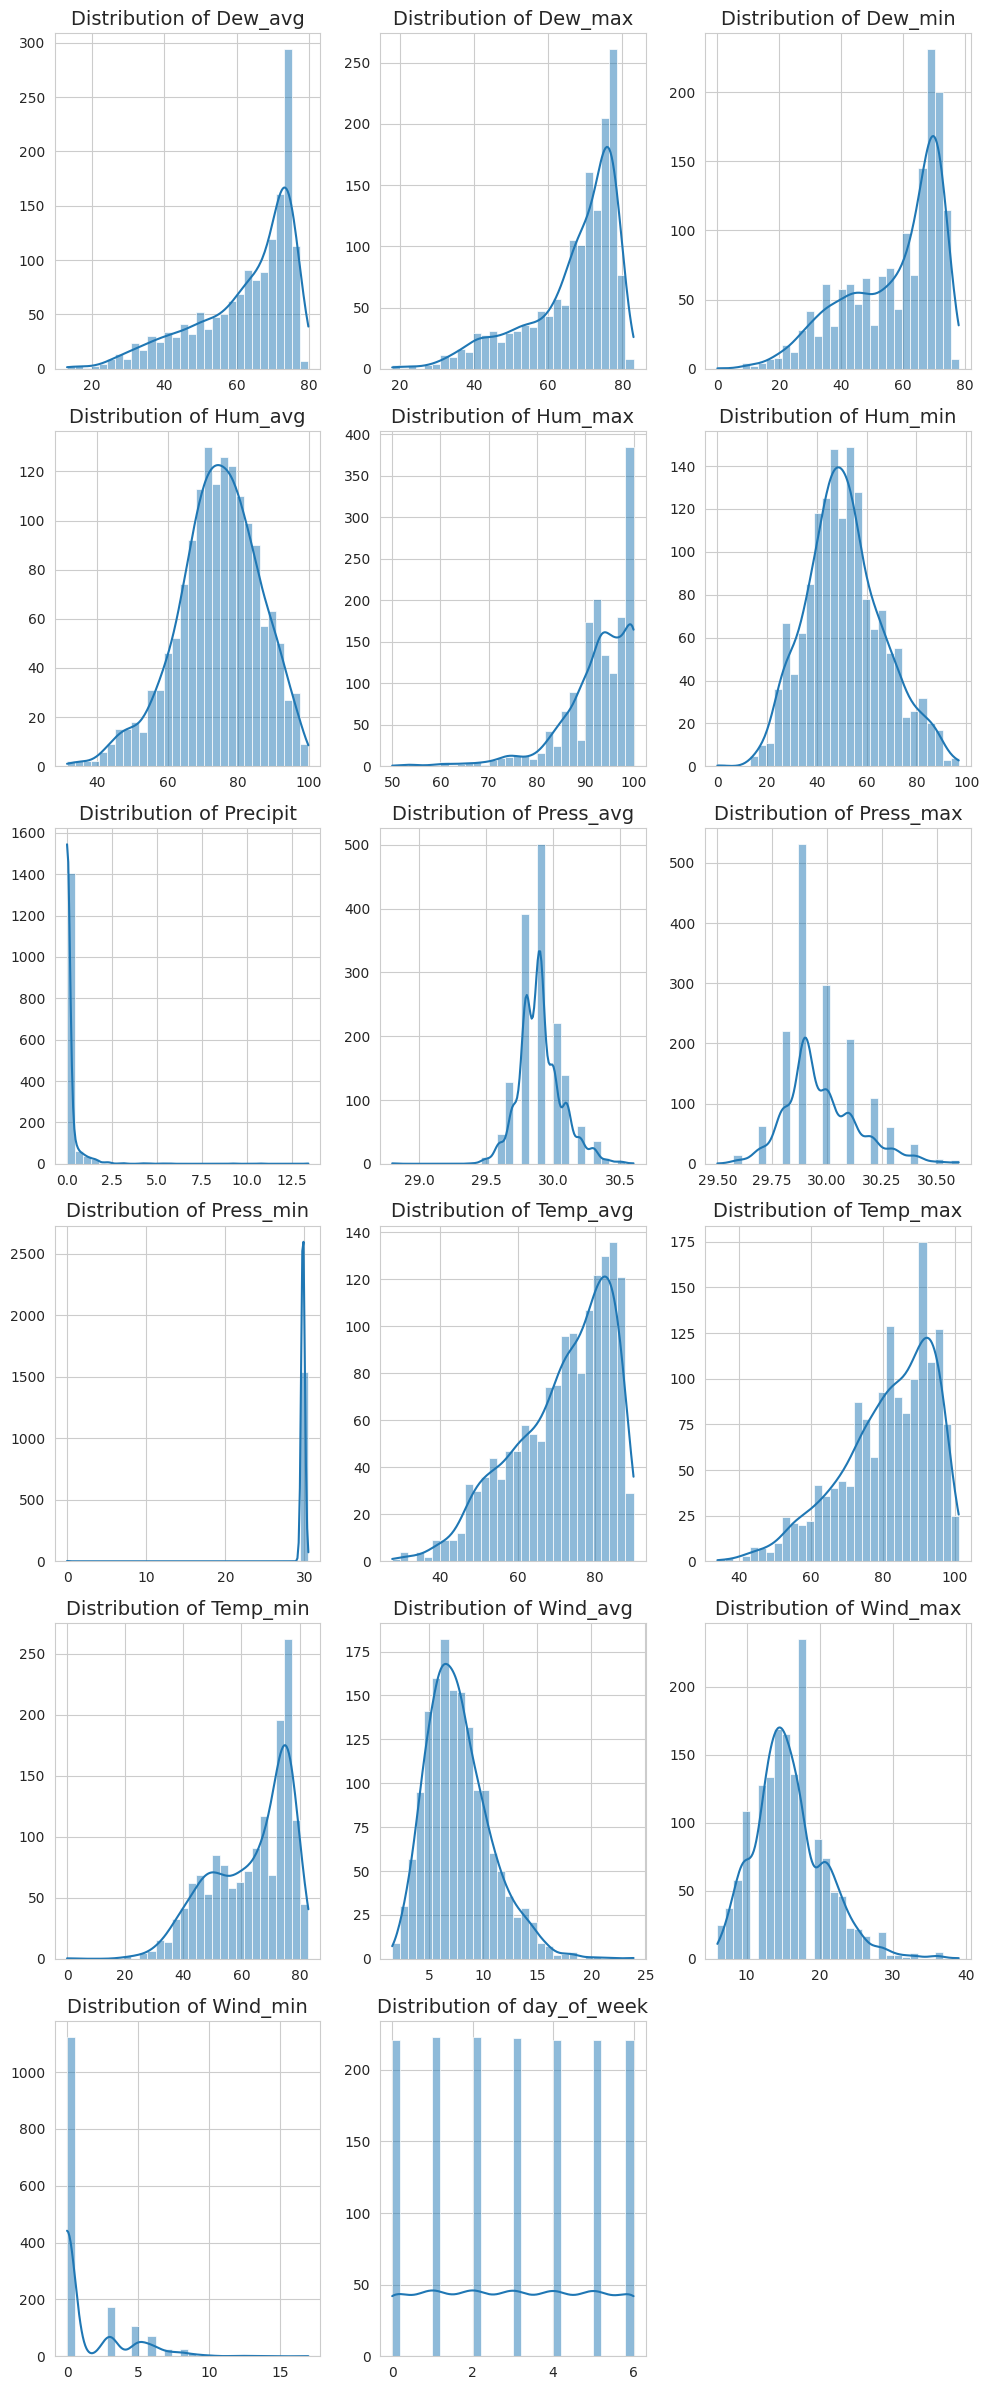

In [7]:
# Defining a function for creating distribution plots
def distribution_plots(data, columns, bins=30):
    n = len(columns)
    n_cols = 3
    n_rows = n // n_cols + int(n % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
    axes = axes.ravel()

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Hide any empty subplots
    for j in range(i+1, n_cols * n_rows):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

# Selecting columns for distribution plots (excluding 'Date' and 'Day' as they are categorical)
columns_for_distribution = weather_data.columns.difference(['Date', 'Day'])

# Creating distribution plots for the selected columns
distribution_plots(weather_data, columns_for_distribution)


In [8]:
# Importing necessary libraries for outlier detection
from scipy.stats import zscore

# Calculating Z-scores for outlier detection
z_scores = zscore(weather_data.select_dtypes(include=['int64', 'float64']))

# Defining a threshold for identifying outliers (commonly used value is 3)
threshold = 3

# Identifying rows with outliers
outlier_rows = (abs(z_scores) > threshold).any(axis=1)

# Displaying the rows with outliers
outliers = weather_data[outlier_rows]
outliers_count = outliers.shape[0]
outliers_count, outliers.head()


(100,
            Date  Day  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
 1    2016-02-06    2        76      71.2        66       74     70.3       66   
 2    2016-03-06    3        79      72.1        68       72     70.0       68   
 3    2016-04-06    4        76      71.2        69       73     70.0       66   
 116  2016-09-25   25        89      76.9        73       77     73.4       71   
 171  2016-11-19   19        64      53.8        45       36     31.6       28   
 
      Hum_max  Hum_avg  Hum_min  Wind_max  Wind_avg  Wind_min  Press_max  \
 1        100     96.8       89        18       7.8         0       29.8   
 2        100     93.6       72        18       4.7         0       29.8   
 3        100     96.1       85        20       7.0         0       29.8   
 116      100     89.3       61        36       7.0         0       29.9   
 171       61     45.0       26        20      11.8         0       30.4   
 
      Press_avg  Press_min  Precipit  day_

<ipython-input-9-207311ad1d6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = weather_data.corr()


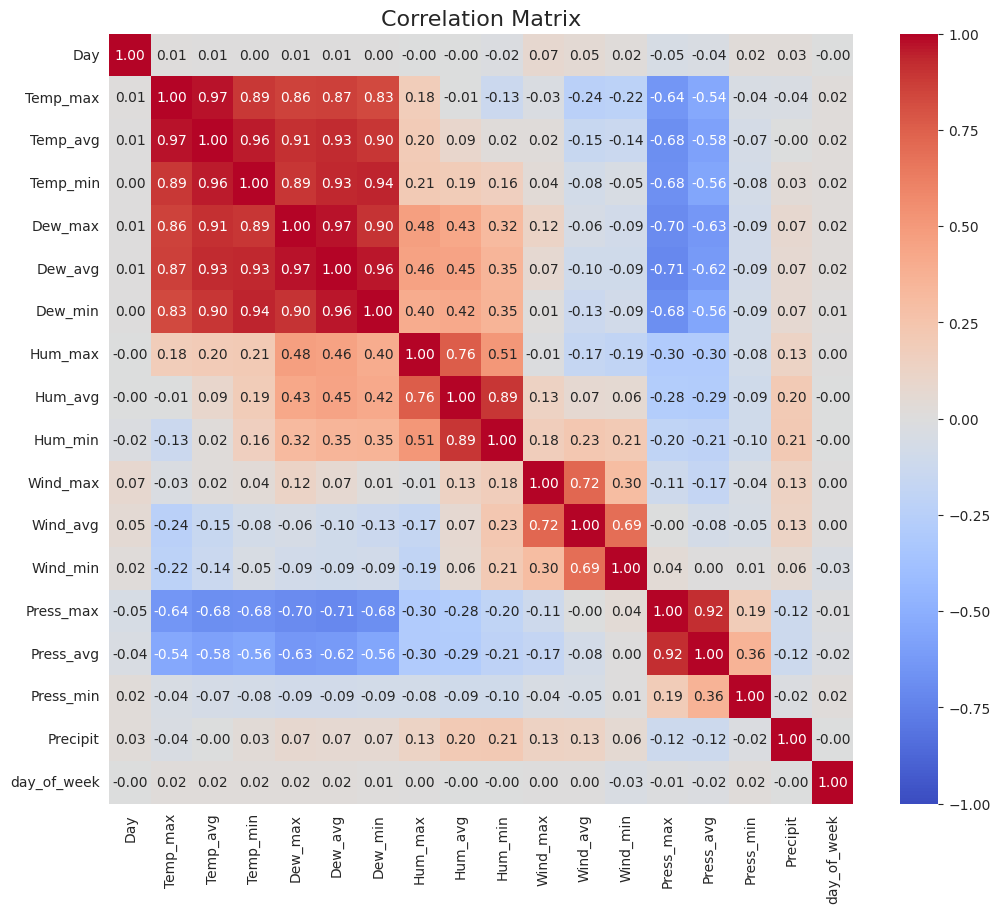

In [9]:
# Calculating the correlation matrix
correlation_matrix = weather_data.corr()

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [10]:
# 1. Handling Outliers

# Clipping temperature values to a specified range (0°F to 120°F)
weather_data['Temp_max'] = weather_data['Temp_max'].clip(lower=0, upper=120)
weather_data['Temp_avg'] = weather_data['Temp_avg'].clip(lower=0, upper=120)
weather_data['Temp_min'] = weather_data['Temp_min'].clip(lower=0, upper=120)

# Clipping humidity values to a specified range (0% to 100%)
weather_data['Hum_max'] = weather_data['Hum_max'].clip(lower=0, upper=100)
weather_data['Hum_avg'] = weather_data['Hum_avg'].clip(lower=0, upper=100)
weather_data['Hum_min'] = weather_data['Hum_min'].clip(lower=0, upper=100)

# 2. Feature Selection

# Dropping highly correlated features
features_to_drop = ['Temp_max', 'Temp_min', 'Dew_max', 'Dew_min', 'Hum_max', 'Hum_min', 'Press_max', 'Press_min', 'Day']
weather_data = weather_data.drop(columns=features_to_drop)

# 3. Data Transformation and Feature Engineering

# Converting 'Date' to datetime and extracting year and month
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
weather_data['Year'] = weather_data['Date'].dt.year
weather_data['Month'] = weather_data['Date'].dt.month

# Dropping the original 'Date' column
weather_data = weather_data.drop(columns=['Date'])

# Displaying the first few rows of the modified dataset
weather_data.head()


,Temp_avg,Dew_avg,Hum_avg,Wind_max,Wind_avg,Wind_min,Press_avg,Precipit,day_of_week,Year,Month
0,74.8,71.4,89.4,21,9.5,0,29.8,0.00,2,2016,1
1,71.2,70.3,96.8,18,7.8,0,29.8,4.33,5,2016,2
2,72.1,70.0,93.6,18,4.7,0,29.8,3.18,6,2016,3
3,71.2,70.0,96.1,20,7.0,0,29.7,2.37,2,2016,4
4,73.8,70.0,88.7,17,7.7,0,29.7,0.39,4,2016,5


In [11]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and target (y)
# For this example, let's assume we are interested in predicting the average temperature ('Temp_avg')
X = weather_data.drop('Temp_avg', axis=1)
y = weather_data['Temp_avg']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the size of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1241, 10), (311, 10), (1241,), (311,))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the testing data
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)

lr_mae, lr_rmse, lr_r2

(0.4391194469764277, 0.6437482371875354, 0.9976423218809009)

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model's performance
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

rf_mae, rf_rmse, rf_r2


(0.5896237942122201, 1.0924296691291266, 0.9932104751766958)

In [15]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor model
rf_model_tuned = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [16]:
# Manually tuned Random Forest Regressor model
rf_model_manual = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the model
rf_model_manual.fit(X_train, y_train)

# Predict on the testing data
rf_predictions_manual = rf_model_manual.predict(X_test)

# Evaluate the model's performance
rf_mae_manual = mean_absolute_error(y_test, rf_predictions_manual)
rf_rmse_manual = mean_squared_error(y_test, rf_predictions_manual, squared=False)
rf_r2_manual = r2_score(y_test, rf_predictions_manual)

rf_mae_manual, rf_rmse_manual, rf_r2_manual


(0.6089362776112768, 1.1855686157494505, 0.9920033922089011)

* **Mean Absolute Error (MAE):** 0.6089°F
* **Root Mean Squared Error (RMSE):** 1.1856°F
* **R-squared (R²):** 0.9920



**Model Comparison:**
Here’s a summary of the performance metrics for each model we've evaluated:

1. **Linear Regression:**

* MAE: 0.4391°F
* RMSE: 0.6437°F
* R²: 0.9976
2. **Random Forest Regressor (Before Manual Tuning):**

* MAE: 0.5896°F
* RMSE: 1.0924°F
* R²: 0.9932
3. **Decision Tree Regressor:**

* MAE: 0.8923°F
* RMSE: 1.4040°F
* R²: 0.9888
4. **Random Forest Regressor (After Manual Tuning):**

* MAE: 0.6089°F
* RMSE: 1.1856°F
* R²: 0.9920

**Model Selection:**
* Best MAE: Linear Regression (0.4391°F)
* Best RMSE: Linear Regression (0.6437°F)
* Best R²: Linear Regression (0.9976)

The Linear Regression model has the lowest MAE and RMSE, and the highest R², making it the best-performing model among those we've evaluated.

In [18]:
import joblib

# Save the Linear Regression model to a file
model_filename = 'linear_regression_model.joblib'
joblib.dump(lr_model, model_filename)


['linear_regression_model.joblib']